In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

Import the Elviz Data for all 88 samples

In [2]:
from elviz_pca import import_elviz_data


elviz_data = import_elviz_data()

print(elviz_data.abundance.describe())

# are there any null values? 
elviz_data[elviz_data.abundance.isnull()]


#elviz_data = pd.read_csv("./results/reduced_data--genus_only.csv", 
#                        dtype={'abundance':'float'})

# TODO: convert NaN abundances to zero. 
# argument: na_values=None,
# na_values : str, list-like or dict, default None
#    Additional strings to recognize as NA/NaN. If dict passed, specific
#    per-column NA values



count    5.352900e+04
mean     1.643969e-03
std      2.331600e-02
min      2.424267e-07
25%      4.668598e-06
50%      1.749988e-05
75%      9.606543e-05
max      7.984020e-01
Name: abundance, dtype: float64


,ID,rep,week,oxy,Genus,Length,abundance,project


In [3]:
elviz_data.head()

,ID,rep,week,oxy,Genus,Length,abundance,project
0,106_HOW12,4,12,High,Methylobacter,4325001,0.701923,1056226
1,76_LOW10,4,10,Low,Methylobacter,6062067,0.701577,1056166
2,94_HOW11,4,11,High,Methylobacter,5268714,0.698849,1056202
3,82_HOW10,4,10,High,Methylobacter,5488758,0.693746,1056178
4,40_LOW7,4,7,Low,Methylobacter,6012817,0.668513,1056094


In [4]:
# Need to have rows = Genus.  
# samples as columns
# In a way it doesn't matter but it will be easier to plt 
# if we 
#elviz_data_pivoted = elviz_data.pivot(index='Genus', 
#                                      columns='ID', values='abundance')

from elviz_pca import pivot_for_pca

elviz_data_pivoted = pivot_for_pca(elviz_data)

In [5]:
print(elviz_data_pivoted.shape)
elviz_data_pivoted.head()

(977, 88)


ID,100_LOW12,103_HOW12,104_HOW12,105_HOW12,106_HOW12,109_LOW13,10_HOW4,110_LOW13,111_LOW13,112_LOW13,...,88_LOW11,8_HOW4,91_HOW11,92_HOW11,93_HOW11,94_HOW11,97_LOW12,98_LOW12,99_LOW12,9_HOW4
Genus,,,,,,,,,,,,,,,,,,,,,
Abiotrophia,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
Acaricomes,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
Acetivibrio,0.00001,0.000000,0.000006,0.000000,0.00000,0.000697,0.000000,0.000253,2.546842e-07,1.397941e-05,...,0.000016,0.000011,0.000003,0.000000,0.000003,0.000000,0.000002,0.000766,0,0.000000
Acetobacter,0.00000,0.000005,0.000008,0.000005,0.00003,0.000000,0.000180,0.000201,3.110095e-06,1.188612e-06,...,0.000006,0.000022,0.000007,0.000027,0.000000,0.000012,0.000006,0.000000,0,0.000083
Acetobacterium,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000017,0.000000,4.266709e-07,8.211922e-07,...,0.000000,0.000131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000050


In [6]:
# Reduce to the most abundant values per sample. 
# Need to drop rows that are below some abundance rowsum. 
from elviz_pca import most_abundant_genera_for_pca

pca_input = most_abundant_genera_for_pca(data=elviz_data_pivoted, top_percent=20)
print(pca_input.shape)
pca_input.head(10)


number of rows to keep: 195
(195, 88)


/Users/janet/elvizAnalysis/elviz_pca.py:39: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data.sort(columns='row_sum', ascending=False, inplace=True)


ID,100_LOW12,103_HOW12,104_HOW12,105_HOW12,106_HOW12,109_LOW13,10_HOW4,110_LOW13,111_LOW13,112_LOW13,...,88_LOW11,8_HOW4,91_HOW11,92_HOW11,93_HOW11,94_HOW11,97_LOW12,98_LOW12,99_LOW12,9_HOW4
Genus,,,,,,,,,,,,,,,,,,,,,
Methylobacter,0.616827,0.225911,0.282648,0.073473,0.701923,0.524244,0.103972,0.587177,0.701402,0.593887,...,0.521862,0.084614,0.564363,0.389002,0.597334,0.698849,0.496885,0.544018,0.672948,0.075084
other,0.158067,0.125687,0.093873,0.197769,0.104544,0.199694,0.251298,0.191630,0.132675,0.152174,...,0.207534,0.177164,0.160769,0.179035,0.160787,0.090202,0.235220,0.214388,0.146305,0.289090
Methylotenera,0.098789,0.371810,0.028309,0.005347,0.013885,0.110765,0.310491,0.002683,0.030411,0.113760,...,0.061106,0.236161,0.013968,0.120259,0.015401,0.031089,0.079913,0.001764,0.029392,0.298211
Methylophilus,0.001554,0.131634,0.445430,0.583474,0.060682,0.003104,0.001683,0.003582,0.001463,0.001866,...,0.019801,0.001568,0.004315,0.000694,0.048923,0.003213,0.003772,0.004186,0.003504,0.000939
Methylosarcina,0.006326,0.002396,0.003158,0.000244,0.000454,0.010087,0.037925,0.019623,0.008330,0.007219,...,0.042230,0.270019,0.005764,0.005339,0.001724,0.004016,0.009713,0.018936,0.008394,0.031484
Acidovorax,0.009083,0.037599,0.026508,0.035342,0.051723,0.015568,0.096500,0.003379,0.004976,0.014307,...,0.015059,0.028095,0.120190,0.097539,0.055727,0.049188,0.027526,0.014359,0.006433,0.037677
Methylomonas,0.012749,0.003361,0.005143,0.001265,0.002982,0.020395,0.012791,0.025598,0.018596,0.013413,...,0.016203,0.023263,0.009030,0.009074,0.003661,0.008243,0.019743,0.030577,0.017156,0.017286
Flavobacterium,0.006316,0.017845,0.060173,0.000132,0.000733,0.000864,0.012461,0.001763,0.001071,0.004239,...,0.010867,0.030877,0.031021,0.029484,0.000887,0.003224,0.009506,0.005938,0.000874,0.040365
Methylomicrobium,0.008090,0.002830,0.003504,0.004169,0.003965,0.020332,0.008001,0.019619,0.006928,0.009433,...,0.008630,0.023409,0.006181,0.007539,0.004055,0.007445,0.018061,0.024848,0.005937,0.008271


In [7]:
pca_input = pca_input.transpose()

In [8]:
pca = PCA()
pca.fit(pca_input)

PCA(copy=True, n_components=None, whiten=False)

In [9]:
print(pca.explained_variance_ratio_) 

[  6.23619405e-01   1.57770346e-01   1.26911929e-01   7.20145260e-02
   9.56462617e-03   4.24226202e-03   2.55292462e-03   8.38549875e-04
   5.47115249e-04   4.12431074e-04   3.09081128e-04   2.41498991e-04
   1.62214120e-04   1.26966501e-04   1.03338021e-04   8.33057405e-05
   7.50197501e-05   7.39406382e-05   5.65450193e-05   3.72577142e-05
   2.99971444e-05   2.65463307e-05   2.37442307e-05   2.08159540e-05
   1.86550986e-05   1.78028204e-05   1.57582755e-05   1.23747945e-05
   1.14585659e-05   9.32183313e-06   8.10350446e-06   6.09515616e-06
   5.45577612e-06   5.08505139e-06   4.16875899e-06   3.96924143e-06
   3.68382312e-06   3.13258949e-06   2.67315131e-06   2.53946745e-06
   2.38996517e-06   2.04793677e-06   1.74051615e-06   1.53992220e-06
   1.49979627e-06   1.38342704e-06   1.12343678e-06   1.06459331e-06
   9.71836870e-07   9.56944708e-07   8.78589079e-07   7.74162276e-07
   6.92569044e-07   6.37530088e-07   5.97277635e-07   5.82928461e-07
   5.36040142e-07   4.76816516e-07

In [10]:
import matplotlib as mpl
mpl.use('TkAgg')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# pca_input.reset_index().ID

In [13]:
pca_input.index

Index(['100_LOW12', '103_HOW12', '104_HOW12', '105_HOW12', '106_HOW12',
       '109_LOW13', '10_HOW4', '110_LOW13', '111_LOW13', '112_LOW13',
       '115_HOW13', '116_HOW13', '117_HOW13', '118_HOW13', '121_LOW14',
       '122_LOW14', '123_LOW14', '124_LOW14', '127_HOW14', '128_HOW14',
       '129_HOW14', '130_HOW14', '13_LOW5', '14_LOW5', '15_LOW5', '16_LOW5',
       '19_HOW5', '1_LOW4', '20_HOW5', '21_HOW5', '22_HOW5', '25_LOW6',
       '26_LOW6', '27_LOW6', '28_LOW6', '2_LOW4', '31_HOW6', '32_HOW6',
       '33_HOW6', '34_HOW6', '37_LOW7', '38_LOW7', '39_LOW7', '3_LOW4',
       '40_LOW7', '43_HOW7', '44_HOW7', '45_HOW7', '46_HOW7', '49_LOW8',
       '4_LOW4', '50_LOW8', '51_LOW8', '52_LOW8', '55_HOW8', '56_HOW8',
       '57_HOW8', '58_HOW8', '61_LOW9', '62_LOW9', '63_LOW9', '64_LOW9',
       '67_HOW9', '68_HOW9', '69_HOW9', '70_HOW9', '73_LOW10', '74_LOW10',
       '75_LOW10', '76_LOW10', '79_HOW10', '7_HOW4', '80_HOW10', '81_HOW10',
       '82_HOW10', '85_LOW11', '86_LOW11', '87_LOW1

In [14]:
from elviz_pca import colnames_to_sample_info_array

plot_info = colnames_to_sample_info_array(pca_input)

In [15]:
plot_info.head()

,ID,oxy,rep,week,project
0,100_LOW12,Low,4,12,1056214
1,103_HOW12,High,1,12,1056217
2,104_HOW12,High,2,12,1056220
3,105_HOW12,High,3,12,1056223
4,106_HOW12,High,4,12,1056226


In [16]:
# plot one replicate for now. 

plot_columns = plot_info[plot_info['rep'] == 1] 
plot_columns = plot_columns[plot_columns['oxy'] == 'Low'] 
plot_columns.ID

5     109_LOW13
14    121_LOW14
22      13_LOW5
27       1_LOW4
31      25_LOW6
40      37_LOW7
49      49_LOW8
58      61_LOW9
66     73_LOW10
75     85_LOW11
84     97_LOW12
Name: ID, dtype: object

In [17]:
# X_r = pca.fit(X).transform(X)
X_r = pca.fit(pca_input).transform(pca_input)
print(X_r)

[[ -1.94094050e-01  -3.16454740e-02  -2.37331800e-03 ...,   7.60956488e-05
    3.67926355e-05  -1.11266248e-17]
 [  2.24090943e-01  -4.45460464e-02  -1.25671855e-01 ...,   1.65746832e-07
   -1.97544725e-05   1.34441069e-17]
 [  1.72828258e-01   3.75229219e-01   3.81090922e-02 ...,  -4.93801002e-05
   -5.83927653e-06  -8.79559012e-18]
 ..., 
 [ -1.27887219e-01   9.19760996e-03   1.25723176e-02 ...,  -3.21614153e-06
   -9.81069516e-06  -1.91293921e-17]
 [ -2.57503574e-01   1.30673911e-03   3.58427561e-02 ...,  -5.71353994e-05
    3.37410031e-05  -1.82959117e-17]
 [  3.65631566e-01  -1.34421063e-01  -1.70244595e-01 ...,   5.07803721e-05
   -4.38191413e-06   2.87313576e-18]]


In [18]:
print(pca_input.shape)
print(X_r.shape)

(88, 195)
(88, 88)


In [19]:
import seaborn as sns
#sns.set_style(style='white')
#sns.despine()
sns.set(style="ticks")

/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


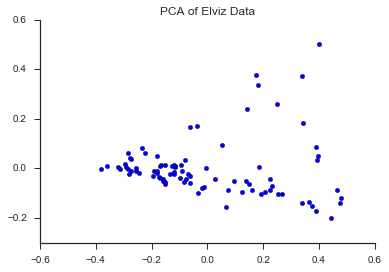

In [20]:
# darkness = week (10 weeks)
# shape = oxygen.  (2 oxygen amts)
plt.figure()
plt.figure(figsize=(6,4))
y=plot_info
plt.scatter(X_r[:,0], X_r[:,1])

plt.legend()
plt.title('PCA of Elviz Data')

sns.despine()
plt.show()

In [21]:
print(plot_info.shape)
print(X_r.shape)

(88, 5)
(88, 88)


In [22]:
plot_info.head()

,ID,oxy,rep,week,project
0,100_LOW12,Low,4,12,1056214
1,103_HOW12,High,1,12,1056217
2,104_HOW12,High,2,12,1056220
3,105_HOW12,High,3,12,1056223
4,106_HOW12,High,4,12,1056226


In [23]:
# [('r', 0, 'setosa'), ('g', 1, 'versicolor'), ('b', 2, 'virginica')]

In [24]:
print(list(range(4, 14+1)))
for x in range(4, 14+1):
    print(x)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
4
5
6
7
8
9
10
11
12
13
14


/Users/janet/.virtualenvs/meta4/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


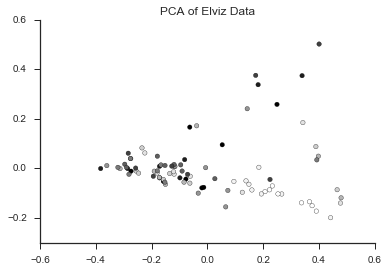

In [25]:
# darkness = week (10 weeks)
# shape = oxygen.  (2 oxygen amts)
plt.figure()
plt.figure(figsize=(6,4))
y=plot_info
#for oxy in ['High', 'Low']:
#    for replicate in range
plt.scatter(X_r[:,0], X_r[:,1], c=plot_info['week'])
#for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
#    plt.scatter(pca[y == i, 0], pca[y == i, 1], c=c, label=target_name)
#for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
#    plt.scatter(pca[y == i, 0], pca[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of Elviz Data')

sns.despine()
plt.show()

In [26]:
pd.DataFrame({'x':X_r[:,0], 'y':X_r[:,1]}).head()

,x,y
0,-0.194094,-0.031645
1,0.224091,-0.044546
2,0.172828,0.375229
3,0.400073,0.501438
4,-0.283969,0.061127


In [27]:
# Make one dataframe with the x-values, y-values, and descriptors. 
plot_data = pd.concat([pd.DataFrame({'principle component 1':X_r[:,0], 
                                     'principle component 2':X_r[:,1]}), 
                       plot_info], axis=1)

In [28]:
plot_data.head()

,principle component 1,principle component 2,ID,oxy,rep,week,project
0,-0.194094,-0.031645,100_LOW12,Low,4,12,1056214
1,0.224091,-0.044546,103_HOW12,High,1,12,1056217
2,0.172828,0.375229,104_HOW12,High,2,12,1056220
3,0.400073,0.501438,105_HOW12,High,3,12,1056223
4,-0.283969,0.061127,106_HOW12,High,4,12,1056226


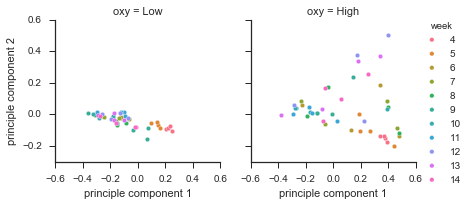

In [29]:
g = sns.FacetGrid(plot_data, col="oxy",  hue="week")
g = (g.map(plt.scatter, "principle component 1", "principle component 2", edgecolor="w").add_legend())

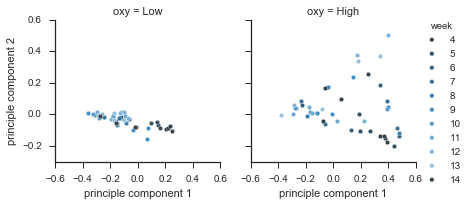

In [30]:
#plt.clf()
#plt.cla()
color_palette = sns.color_palette(palette="Blues_d", n_colors=10, desat=None)
#cmhot = plt.cm.get_cmap("hot")
g = sns.FacetGrid(plot_data, col="oxy", hue='week', palette=color_palette)
#plt.figure(figsize=(12,6))
g = (g.map(plt.scatter, "principle component 1", 
           "principle component 2", edgecolor="w").add_legend())
g.fig.savefig('pca.pdf')

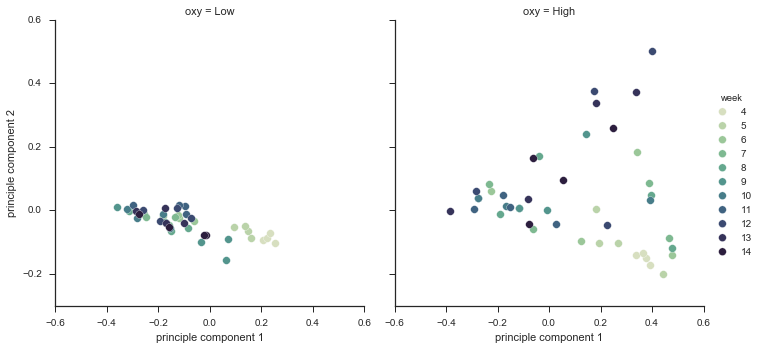

In [32]:
color_palette = sns.cubehelix_palette(11, start=.5, rot=-.75)
plt.figure(figsize=(12, 6))
#cmhot = plt.cm.get_cmap("hot")
g = sns.FacetGrid(plot_data, col="oxy", hue='week', palette=color_palette,
                 size=5, aspect=1)
#plt.figure(figsize=(12,6))
g = (g.map(plt.scatter, "principle component 1", 
           "principle component 2", edgecolor="w", s= 60).add_legend())
g.fig.savefig('pca.pdf')

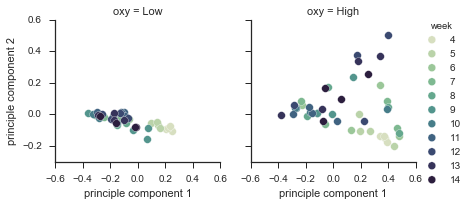

In [33]:
color_palette = sns.cubehelix_palette(11, start=.5, rot=-.75)
#cmhot = plt.cm.get_cmap("hot")
g = sns.FacetGrid(plot_data, col="oxy", hue='week', palette=color_palette,
                 size=3, aspect=1)
#plt.figure(figsize=(12,6))
g = (g.map(plt.scatter, "principle component 1", 
           "principle component 2", edgecolor="w", s= 60).add_legend())
g.fig.savefig('pca_2.pdf', size=(8,4))

In [ ]:
sns.color_palette("Blues_d")

In [ ]:
pal = dict(Lunch="seagreen", Dinner="gray")

In [ ]:
g = sns.FacetGrid(plot_data, col="oxy", col_wrap=2)
g.map(sns.pointplot, "principle component 1", "principle component 2", color=".3", ci=None);

In [ ]:
plot_data.plot.scatter(x="principle component 1", y="principle component 2")

In [ ]:
g = sns.FacetGrid(plot_data, col="oxy",  hue="week")
g = (g.map(sns.lmplot("principle component 1", 
                      "principle component 2",  hue='week')).add_legend())